O racional por trás deste trabalho ocorreu de forma inversa ao que costumo fazer. Na maioria das vezes, analiso um determinado conjunto de dados e, com base no que encontro, escolho o melhor dataviz e construo uma narrativa. Geralmente, já tenho uma ideia das ferramentas que vou precisar usar. No entanto, neste projeto específico, ocorreu o contrário. Primeiro, eu já tinha uma ideia clara do que precisava fazer, que era criar uma nuvem de palavras com os principais tópicos relacionados a um determinado assunto no Google Trends. A partir dessa necessidade, comecei a desenvolver uma ideia inicial e, em seguida, fui em busca das bibliotecas que precisaria usar, especialmente o *pytrends*, já que nunca tinha trabalhado diretamente com a API de busca. 

In [4]:
#importando bibliotecas
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pytrends.request import TrendReq

In [5]:
#temporizador para evitar chamadas da bibliotecas pytrends repetidamente
import time
time.sleep(30)

A necessidade de implementar um 'temporizador' usando a biblioteca *time* surgiu no decorrer do projeto, após a realização de várias solicitações à API durante a implementação do código, o que resultou na perda do acesso por alguns dias devido a restrições. Como medida preventiva, optei por criar um temporizador para limitar a frequência dessas solicitações e evitar o problema de realizar várias solicitações em um curto período de tempo.

In [6]:
#configurando pytrends
pytrends = TrendReq(hl='pt-BR', tz=180, geo='BR')
palavra_chave = ['economia']
categorias = 0
tempo = 'today 1-m'
regiao = 'BR'

In [7]:
#configurando nuvem de palavras
def criar_nuvem_palavras():
    #construindo o payload da pesquisa
    pytrends.build_payload(palavra_chave, cat=categorias, timeframe=tempo, geo=regiao)

    #extraindo os dados da pesquisa
    topicos_relacionados = pytrends.related_topics()
    topicos_pesquisa = topicos_relacionados[palavra_chave[0]]['top']
    termos_relacionados = topicos_pesquisa['topic_title'].values.tolist()

    #excluindo palavras sem utilidade na busca
    termos_excluidos = ['a', 'o', 'ao', 'da', 'do', 'de', 'um', 'uma','analysis', 'renault', 'mastercard']
    termos_relacionados = [termo_unico for termo_unico in termos_relacionados if not any(word.lower() in termos_excluidos for word in termo_unico.split())]

    #excluindo a palavra-chave da lista de termos_relacionados
    termos_relacionados = [termo_unico for termo_unico in termos_relacionados if termo_unico.lower() != palavra_chave[0].lower()]

    #variável para a nuvem de palavras
    lista_termos = " ".join(termos_relacionados)

    #gerando a nuvem de palavras
    lista_cores = ['blue', 'purple', 'gray', 'pink']
    random.shuffle(lista_cores)
    nuvem_palavras = WordCloud(width=450, height=450,
                               background_color='white',
                               max_words=50,
                               colormap='Pastel1',
                               color_func=lambda *args,
                               **kwargs: random.choice(lista_cores),
                               font_step=2,
                               min_font_size=10, max_font_size=50).generate(lista_termos)

    #plotando a nuvem de palavras
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(nuvem_palavras)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f'Assuntos relacionados à "{palavra_chave[0]}" nos últimos 30 dias', fontsize=24)
    

    #salvando a nuvem de palavras em um arquivo PDF
    plt.savefig('nuvem_palavras_economia.pdf', bbox_inches='tight')

Um dos maiores desafios que enfrentei neste projeto foi a remoção de palavras repetidas do conjunto de termos filtrados. Isso se tornou particularmente desafiador devido a alguns artigos, pronomes e outras palavras desse tipo que estavam entre palavras importantes.

Por exemplo, se o código me retornar o tópico relacionado "análise de dados", faz sentido para este trabalho manter as palavras "análise" e "dados", no entanto, não faz muito sentido manter a palavra "de", que apenas ocuparia espaço que poderia ser preenchido por outro termo importante. Somente depois de um tempo considerei implementar a função *split*, que, para muitos, poderia parecer óbvia. Conseguir remover termos que não faziam sentido para a minha busca fez uma diferença significativa na visualização final.

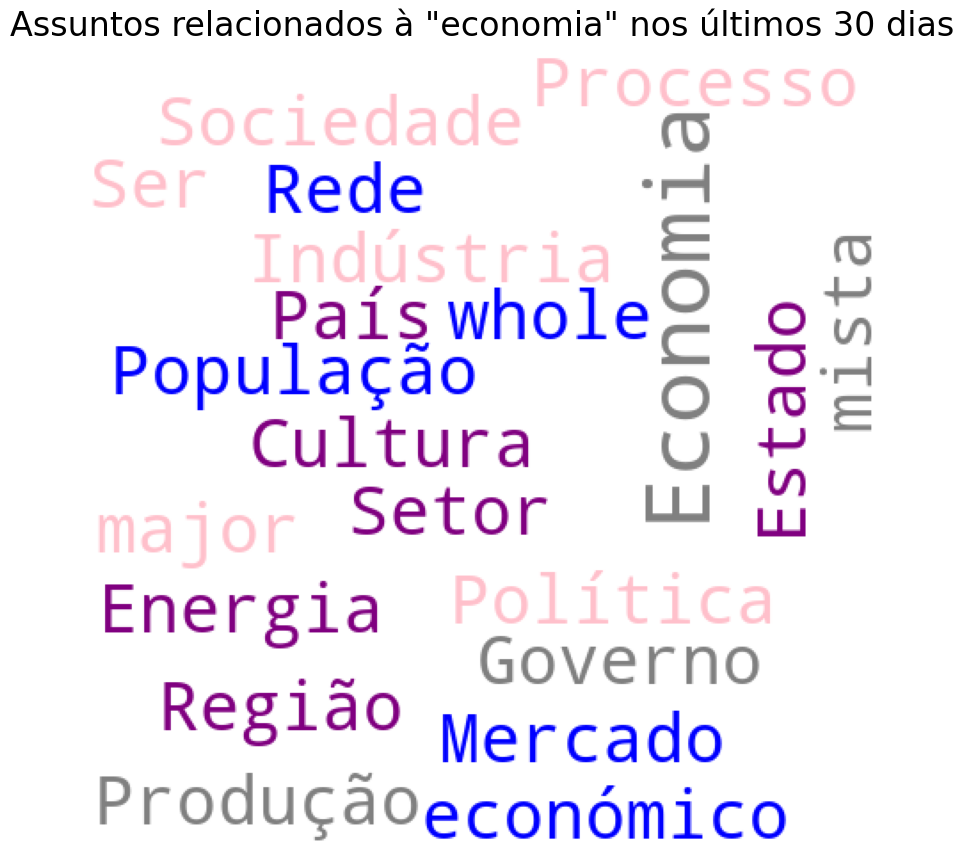

In [8]:
#gerando a nuvem de palavras
criar_nuvem_palavras()